<a href="https://colab.research.google.com/github/enockmwizerwa123/Movie-sentiment-Analysis/blob/main/British_Airways_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <center> Task 1: Web scraping and analysis

---

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
data= pd.DataFrame()
data["reviews"] = reviews
data.head()

,reviews
0,Not Verified | British Airways has confirmed ...
1,✅ Trip Verified | Worst BA experience. I was s...
2,✅ Trip Verified | My daughter and I were deni...
3,✅ Trip Verified | Despite boarding being the u...
4,"Not Verified | Flight cancelled, no crew! 9th..."


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [4]:
data

,reviews
0,Not Verified | British Airways has confirmed ...
1,✅ Trip Verified | Worst BA experience. I was s...
2,✅ Trip Verified | My daughter and I were deni...
3,✅ Trip Verified | Despite boarding being the u...
4,"Not Verified | Flight cancelled, no crew! 9th..."
...,...
995,✅ Trip Verified | Boston to Nairobi via Londo...
996,✅ Trip Verified | Basel to San Fransisco via ...
997,✅ Trip Verified | London to Lyon. The flight ...
998,✅ Trip Verified | London to Boston. I was sea...


<h1> <center> Data preprocessing

---

**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Step 1. Removing the parts before | in the reviews column**

In [5]:
data.reviews= data.reviews.str.split('|',expand=True)[1]

In [6]:
data

,reviews
0,British Airways has confirmed itself as the ...
1,Worst BA experience. I was supposed to fly ou...
2,My daughter and I were denied boarding on ou...
3,Despite boarding being the usual free for all...
4,"Flight cancelled, no crew! 9th September 202..."
...,...
995,Boston to Nairobi via London. The only good ...
996,Basel to San Fransisco via Heathrow. I'm con...
997,London to Lyon. The flight has 1h 30 delay f...
998,London to Boston. I was seated next to a cus...


**Step 2. Cleaning the text**

In [7]:
import re
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
data['Cleaned Reviews'] = data['reviews'].apply(clean)
data.head()

,reviews,Cleaned Reviews
0,British Airways has confirmed itself as the ...,British Airways has confirmed itself as the w...
1,Worst BA experience. I was supposed to fly ou...,Worst BA experience I was supposed to fly out...
2,My daughter and I were denied boarding on ou...,My daughter and I were denied boarding on our...
3,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...
4,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not pea...


**Step 3. Tokenization**

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

**Step 4: Enrichment POS tagging**

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

**Step 5: Stopwords removal**
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

**Step 6: Obtaining the stem words**
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [10]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

data['POS tagged'] = data['Cleaned Reviews'].apply(token_stop_pos)
data.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,British Airways has confirmed itself as the ...,British Airways has confirmed itself as the w...,"[(British, a), (Airways, n), (confirmed, v), (..."
1,Worst BA experience. I was supposed to fly ou...,Worst BA experience I was supposed to fly out...,"[(Worst, n), (BA, n), (experience, n), (suppos..."
2,My daughter and I were denied boarding on ou...,My daughter and I were denied boarding on our...,"[(daughter, n), (denied, v), (boarding, v), (b..."
3,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...,"[(Despite, None), (boarding, v), (usual, a), (..."
4,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not pea...,"[(Flight, n), (cancelled, v), (crew, n), (th, ..."


In [11]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,British Airways has confirmed itself as the ...,British Airways has confirmed itself as the w...,"[(British, a), (Airways, n), (confirmed, v), (...",British Airways confirm bad airline UK Last ...
1,Worst BA experience. I was supposed to fly ou...,Worst BA experience I was supposed to fly out...,"[(Worst, n), (BA, n), (experience, n), (suppos...",Worst BA experience suppose fly Italy Septem...
2,My daughter and I were denied boarding on ou...,My daughter and I were denied boarding on our...,"[(daughter, n), (denied, v), (boarding, v), (b...",daughter deny board business class flight Ma...
3,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...,"[(Despite, None), (boarding, v), (usual, a), (...",Despite board usual free LHR group call boar...
4,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not pea...,"[(Flight, n), (cancelled, v), (crew, n), (th, ...",Flight cancel crew th September peak holiday...


In [12]:
data[['reviews','Lemma']]

,reviews,Lemma
0,British Airways has confirmed itself as the ...,British Airways confirm bad airline UK Last ...
1,Worst BA experience. I was supposed to fly ou...,Worst BA experience suppose fly Italy Septem...
2,My daughter and I were denied boarding on ou...,daughter deny board business class flight Ma...
3,Despite boarding being the usual free for all...,Despite board usual free LHR group call boar...
4,"Flight cancelled, no crew! 9th September 202...",Flight cancel crew th September peak holiday...
...,...,...
995,Boston to Nairobi via London. The only good ...,Boston Nairobi via London good thing new cle...
996,Basel to San Fransisco via Heathrow. I'm con...,Basel San Fransisco via Heathrow convince qu...
997,London to Lyon. The flight has 1h 30 delay f...,London Lyon flight h delay flight duration G...
998,London to Boston. I was seated next to a cus...,London Boston seat next customer need extra ...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [13]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

data['Sentiment'] = data['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
data['Analysis'] = data['Sentiment'].apply(vader_analysis)
data.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,British Airways has confirmed itself as the ...,British Airways has confirmed itself as the w...,"[(British, a), (Airways, n), (confirmed, v), (...",British Airways confirm bad airline UK Last ...,-0.5423,Negative
1,Worst BA experience. I was supposed to fly ou...,Worst BA experience I was supposed to fly out...,"[(Worst, n), (BA, n), (experience, n), (suppos...",Worst BA experience suppose fly Italy Septem...,-0.0516,Negative
2,My daughter and I were denied boarding on ou...,My daughter and I were denied boarding on our...,"[(daughter, n), (denied, v), (boarding, v), (b...",daughter deny board business class flight Ma...,-0.9436,Negative
3,Despite boarding being the usual free for all...,Despite boarding being the usual free for all...,"[(Despite, None), (boarding, v), (usual, a), (...",Despite board usual free LHR group call boar...,0.9627,Positive
4,"Flight cancelled, no crew! 9th September 202...",Flight cancelled no crew th September not pea...,"[(Flight, n), (cancelled, v), (crew, n), (th, ...",Flight cancel crew th September peak holiday...,-0.8834,Negative


In [19]:
data_new = data['Analysis'].value_counts()
data_new

Positive    490
Negative    406
Neutral     104
Name: Analysis, dtype: int64

# Data Exploration

([<matplotlib.patches.Wedge at 0x780a13696590>,
 [Text(0.03455180204558485, 1.0994572174374968, 'Positive'),
  Text(-0.3855877282896095, -1.0302048843761413, 'Negative'),
  Text(1.0512791161426571, -0.35624741397280874, 'Neutral')],
 [Text(0.018846437479409915, 0.5997039367840891, '49.0%'),
  Text(-0.21032057906705973, -0.5619299369324406, '40.6%'),
  Text(0.5777299647270457, -0.1957756058769489, '10.4%')])

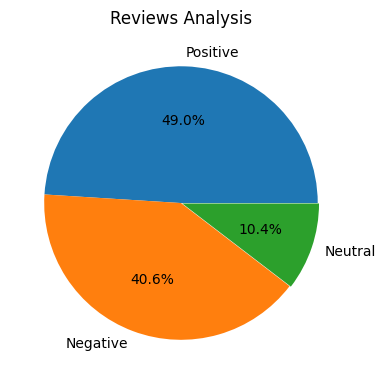

In [21]:
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(data_new.values, labels = data_new.index, explode = (0, 0, 0.01), autopct='%1.1f%%', shadow=False)

In [22]:
data.to_csv("BA_reviews.csv")

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

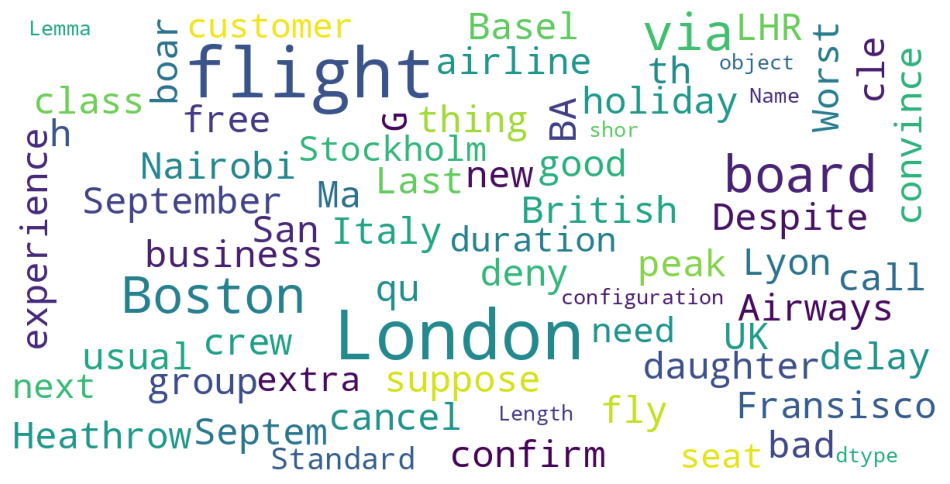

In [23]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data.Lemma)